# <u> Decision Trees </u>

Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multi-output tasks. They are very powerful algorithms, capable of fitting complex datasets. Decision Trees split the instances into two or more homogeneous sets based on most significant splitter / differentiator in input variables.

Decision Trees are also the fundamental components of Random Forests, which are among the most powerful Machine Learning algorithms available today.

### <u> Advantages </u>
- <b><u>Easy to Understand</u></b>: Decision tree output is very easy to understand even for people from non-analytical background. It does not require any statistical knowledge to read and interpret them. Its graphical representation is very intuitive and users can easily relate their hypothesis.
    
- <b><u>Useful in Data exploration</u></b>: Decision tree is one of the fastest way to identify most significant variables and relation between two or more variables. With the help of decision trees, we can create new variables / features that has better power to predict target variable. You can refer article (Trick to enhance power of regression model) for one such trick.  It can also be used in data exploration stage. For example, we are working on a problem where we have information available in hundreds of variables, there decision tree will help to identify most significant variable.
- <b><u>Less data cleaning required</u></b>: It requires less data cleaning compared to some other modeling techniques. It is not influenced by outliers and missing values to a fair degree.
- <b><u>Data type is not a constraint</u></b>: It can handle both numerical and categorical variables.
- <b><u>Non Parametric Model</u></b>: Decision trees are considered to be a non-parametric models, not because they do not have any parameters (they often have a lot) but because the number of parameters are not determined prior to training, so the model structure is free to stick closely to the data. In contrast, a parametric model such as a linear model has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting).

### <u> Disadvantages </u>
- <b><u>Over fitting</u></b>: Over fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters and pruning.
- <b><u>Not fit for continuous variables</u></b>: While working with continuous numerical variables, decision tree looses information when it categorizes variables in different categories.

## <u> Training and Visualizing a Decision Tree </u>

To understand Decision Trees, let’s just build one and take a look at how it makes predictions.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz

df_iris = pd.read_csv("../input/iris/Iris.csv")

# Removing the unnecessary column
df_iris.drop('Id',axis=1,inplace=True)

df_iris_X = df_iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
df_iris_y = df_iris.Species

tree_clf = DecisionTreeClassifier(max_depth=2, random_state = 36)
tree_clf.fit(df_iris_X, df_iris_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=36, splitter='best')

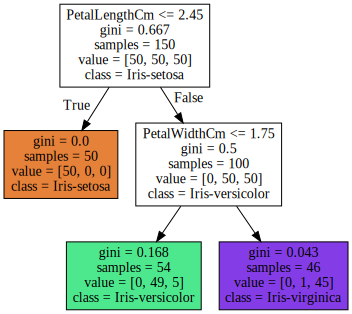

In [2]:
# Visualize the trained Decision Tree by export_graphviz() method

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

labels = df_iris_X.columns

graph = Source(tree.export_graphviz(tree_clf ,feature_names = labels, class_names = df_iris_y.unique(), max_depth = 2, filled = True))
display(SVG(graph.pipe(format='svg')))

## <u>Making Predictions</u>

The classification starts at the root node (depth 0, top node) and check whether the flower’s petal length is smaller than 2.45 cm. If True, it move down to the root’s left child node (depth 1, left). Since it is a leaf node, it predicts that the flower is an Iris-Setosa (class=setosa). If False, it move down to the root’s right child node (depth 1, right), which is not a leaf node, so it asks another question: is the petal width smaller than 1.75 cm? If True, flower is most likely an Iris-Versicolor (depth 2, left). If False, it is likely an Iris-Virginica (depth 2, right).

- <b> <u> Samples </u> </b>: counts how many training instances it applies to. For example, 100 training instances have a petal length greater than 2.45 cm (depth 1, right), among which 54 have a petal width smaller than 1.75 cm (depth 2, left).
- <b> <u> Value </u> </b>:  tells us how many training instances of each class this node applies to: for example, the bottom-right node applies to 0 Iris-Setosa, 1 Iris- Versicolor, and 45 Iris-Virginica.
- <b> <u> Gini </u> </b>: measures impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class. For example, since the depth-1 left node applies only to Iris-Setosa training instances, it is pure and its gini score is 0, the depth-2 left node has a gini score equal to 1 – $\frac{0}{54}^2$ – $\frac{49}{54}^2$ – $\frac{5}{54}^2$ ≈ 0.168.
- <b><u> Entropy </u></b>: By default, Gini impurity measure is used, we can select the entropy impurity measure instead by setting the criterion hyperparameter to "entropy". A set’s entropy is zero when it contains instances of only one class.  For example, since the depth-1 left node applies only to Iris-Setosa training instances, it is pure and its entropy is 0, the depth-2 left node has entropy equal to − $\frac{49}{54}$ $\log\big({\frac{49}{54}}\big)$ − $\frac{5}{54}$ $\log\big({\frac{5}{54}}\big)$ ≈ 0.31.

<b>Note </b>: A node’s Gini impurity is generally lower than its parent’s. This is ensured by the CART training algorithm’s cost function, which splits each node in a way that minimizes the weighted sum of its children’s Gini impurities. However, if one child is smaller than the other, it is possible for it to have a higher Gini impurity than its parent, as long as this increase is more than compensated for by a decrease of the other child’s impurity.

#### <u> Gini impurity or Entropy ? </u>

Most of the time it does not make a big difference: they lead to similar trees. Gini impurity is slightly faster to compute, so it is a good default. However, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees.

## <u> Estimating Class/ Class Probabilities </u>

Decision Tree can estimate the probability that an instance belongs to a particular class k: It traverses the tree to find the leaf node for this instance and returns the ratio of training instances of class k in this node. For example, a flower's petals are 5 cm long and 1.5 cm wide. The corresponding leaf node is the depth-2 left node, so the Decision Tree should output the following probabilities: 0% for Iris-Setosa $\frac{0}{54}$, 90.7% for Iris-Versicolor $\frac{49}{54}$, and 9.25% for Iris-Virginica $\frac{5}{54}$.

It can also predict the instance class. For the above instance, it should output Iris-Versicolor (class 1) since it has the highest probability

In [3]:
tree_clf.predict_proba([[1,1, 5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [4]:
tree_clf.predict([[1,1, 5, 1.5]])

array(['Iris-versicolor'], dtype=object)

<b>Note </b>: As we can see in the below graphs, Petal Features are giving a better division compared to the Sepal features. As we increse the depth of the Tree, it will also classify the instances based on the Sepal features. In the above test example, we have kept the Sepal Features constant(1).

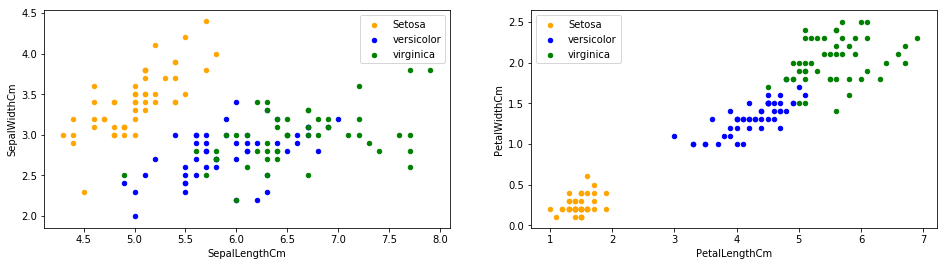

In [5]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,4)

df_iris[df_iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa', ax = ax1)
df_iris[df_iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=ax1)
df_iris[df_iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=ax1)

df_iris[df_iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa', ax = ax2)
df_iris[df_iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=ax2)
df_iris[df_iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=ax2)

plt.show()

## <u>CART Training Algorithm </u>

Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train Decision Trees. The algorithm first splits the training set in two subsets using a single feature k and a threshold $t_k$ (e.g., “petal length ≤ 2.45 cm”). How does it choose k and $t_k$ ? It searches for the pair (k, $t_k$) that produces the purest subsets (weighted by their size). The cost function that the algorithm tries to minimize is given by:

$$J(k, t_k) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right}$$

where $G_{left/right}$ = measures the impurity of the left/right subset, $m_{left/right}$ = is the number of instances in the left/right subset.

Once it successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets and so on, recursively. It stops recursing once it reaches a set hyperparameter( maximum depth / min_samples_split / min_sam ples_leaf / min_weight_fraction_leaf / max_leaf_nodes), or if it cannot find a split that will reduce impurity.

<b>Note: </b> CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.

## <u>Regularization Hyperparameters</u>

<b><u>Maximum depth of tree (SkLearn - max_depth)</u></b>
- Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
- Should be tuned using CV.

<b><u>Minimum samples for a node split (SkLearn - min_samples_split)</u></b>
- Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
- Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
- Too high values can lead to under-fitting hence, it should be tuned using CV.

<b><u>Minimum samples for a terminal node (SkLearn - min_samples_leaf)</u></b>
- Defines the minimum samples (or observations) required in a terminal node or leaf.
- Used to control over-fitting similar to min_samples_split.
- Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.

<b><u>Maximum number of terminal nodes (SkLearn - max_leaf_nodes)</u></b>
- The maximum number of terminal nodes or leaves in a tree.
- Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.

<b><u>Maximum features to consider for split (SkLearn - max_features)</u></b>
- The number of features to consider while searching for a best split. These will be randomly selected.
- As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.
- Higher values can lead to over-fitting but depends on case to case.

<b>Note </b>: Some algorithms work by first training the Decision Tree without restrictions, then pruning unnecessary nodes. A node whose children are all leaf nodes is considered unnecessary if its purity is not statistically significant (null hypothesis).. If the probability(p- value) is higher than a given threshold (typically 5%), then the node is considered unnecessary and its children are deleted. The pruning continues until all unnecessary nodes have been pruned.

## <u>Computational Complexity</u>

Making predictions requires traversing the Decision Tree from the root to a leaf. Decision Trees are generally approximately balanced, so traversing the Decision Tree requires going through roughly $O(log_2(m))$ nodes. Since each node only requires checking the value of one feature, the overall prediction complexity is just O(log2(m)), independent of the number of features. So predictions are very fast, even when dealing with large training sets.

However, the training algorithm compares all features (or less if max_features is set) on all samples at each node. This results in a training complexity of O(n × m log(m)) where n = num. of fearures, m = number of instances. For small training sets (less than a few thousand instances), Scikit-Learn can speed up training by presorting the data (set presort=True), but this slows down training considerably for larger training sets.

## <u>Regression</u>

In [6]:
from sklearn.tree import DecisionTreeRegressor

melb_data = pd.read_csv("../input/melbourne-housing-snapshot/melb_data.csv")

melb_data_X = melb_data[['Rooms','Bathroom','Landsize','Lattitude','Longtitude']]
melb_data_y = melb_data['Price']

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(melb_data_X, melb_data_y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

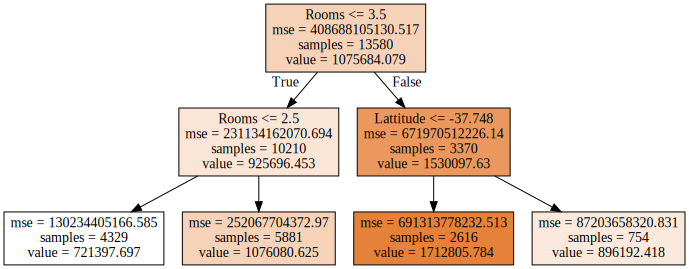

In [7]:
# Visualize the trained Decision Tree by export_graphviz() method

labels = melb_data_X.columns

graph = Source(tree.export_graphviz(tree_reg ,feature_names = labels, max_depth = 2, filled = True))
display(SVG(graph.pipe(format='svg')))

This tree looks very similar to the classification tree we built earlier. The main difference is that instead of predicting a class in each node, it predicts a value. For example, suppose we want to make a prediction for a new instance with "Rooms" = 3. We traverse the tree starting at the root, and we eventually reach the leaf node that predicts value = 1076080.625. This prediction is simply the average target value of the 5881 training instances associated to this leaf node. This prediction results in a Mean Squared Error (MSE) equal to 252067704372.97 over these 5881 instances.

## <u>CART Training Algorithm </u>

The CART algorithm works mostly the same way as earlier, except that instead of try‐ ing to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that minimizes the MSE.

$$J(k, t_k) = \frac{m_{left}}{m} MSE_{left} + \frac{m_{right}}{m} MSE_{right}$$

### <u>Tree based models vs. Linear models </u>

- If the relationship between dependent & independent variable is well approximated by a linear model, linear regression will outperform tree based model.
- If there is a high non-linearity & complex relationship between dependent & independent variables, a tree model will outperform a classical regression method.
- If we need to build a model which is easy to explain to people, a decision tree model will always do better than a linear model. Decision tree models are even simpler to interpret than linear regression!

<b>Quick Note</b>
- Decision Trees require very little data preparation. In particular, they don’t require feature scaling or centering at all.
- Scikit-Learn uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two children (i.e., questions only have yes/no answers). However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.
- Decision Trees are fairly intuitive and their decisions are easy to interpret. Such models are often called white box models. In contrast, Random Forests or neural networks are generally considered black box models. Decision Trees provide nice and simple classification rules that can even be applied manually if need be (e.g., for flower classification).

## <u>Bonus</u>:
### <u>Plotting decision boundaries of classifiers</u>

The function below plots the decision boundary for the classifier.

In [8]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k')

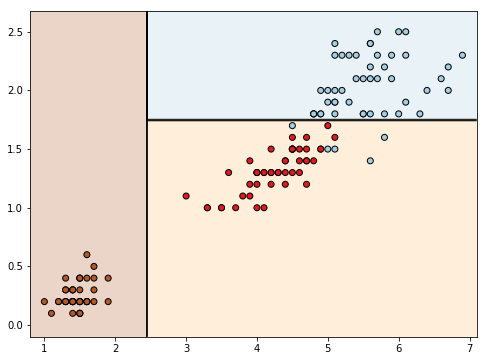

In [9]:
import numpy as np

# Load the dataset
df_iris = pd.read_csv("../input/iris/Iris.csv")

# The reason for using two-dimensional numerical data is that we want to show the examples visually.
df_iris_X = df_iris[['PetalLengthCm','PetalWidthCm']]
df_iris_y = df_iris.Species

# convert dataframe to numpy array
df_iris_X = df_iris_X.to_numpy()
df_iris_y = df_iris_y.astype('category').cat.codes

# Fit on classifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(df_iris_X, df_iris_y)

plot_decision_boundary(tree_clf, df_iris_X, df_iris_y)

### End
If you reached this far, please comment and upvote this kernel, feel free to make improvements on the kernel and please share if you found anything useful!